In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')


In [2]:
df = pd.read_csv('synth_dataset.csv')
df.shape

(5110, 12)

In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
for col in df.columns.to_list()[1:]:
    if len(df[col].value_counts().sort_values())<20:
        print(col)
        print(df[col].value_counts().sort_values())
        print('\n')

gender
Other        1
Male      2115
Female    2994
Name: gender, dtype: int64


hypertension
1     498
0    4612
Name: hypertension, dtype: int64


heart_disease
1     276
0    4834
Name: heart_disease, dtype: int64


ever_married
No     1757
Yes    3353
Name: ever_married, dtype: int64


work_type
Never_worked       22
Govt_job          657
children          687
Self-employed     819
Private          2925
Name: work_type, dtype: int64


Residence_type
Rural    2514
Urban    2596
Name: Residence_type, dtype: int64


smoking_status
smokes              789
formerly smoked     885
Unknown            1544
never smoked       1892
Name: smoking_status, dtype: int64


stroke
1     249
0    4861
Name: stroke, dtype: int64




### stroke to non-stroke ratio is very low only 4% had strokes so the data is imbalanced

### in Smoking_status Unknown count is very high if we changed it to any other class it will change the data distribution also it represent 30% of the data so I can't drop data with unknown smoking status & it will be considered a status 

In [6]:
df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


<AxesSubplot:xlabel='bmi', ylabel='Density'>

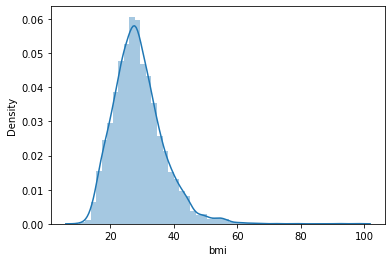

In [7]:
sns.distplot(df.bmi)

In [8]:
df.bmi.mean()

28.893236911794673

In [9]:
df.duplicated().sum()

0

### so no duplication in the data but there is nulls in the BMI i'll fill nans with mean as the missing data is 3% of the data so filling it won't change the data distribution 

In [10]:
df.bmi = df.bmi.fillna(value = df.bmi.mean())
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


<AxesSubplot:xlabel='bmi', ylabel='Density'>

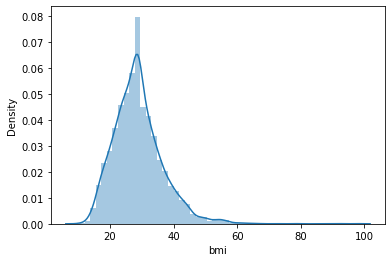

In [11]:
sns.distplot(df.bmi)

In [12]:
to_count = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

In [13]:
df.columns.to_list()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

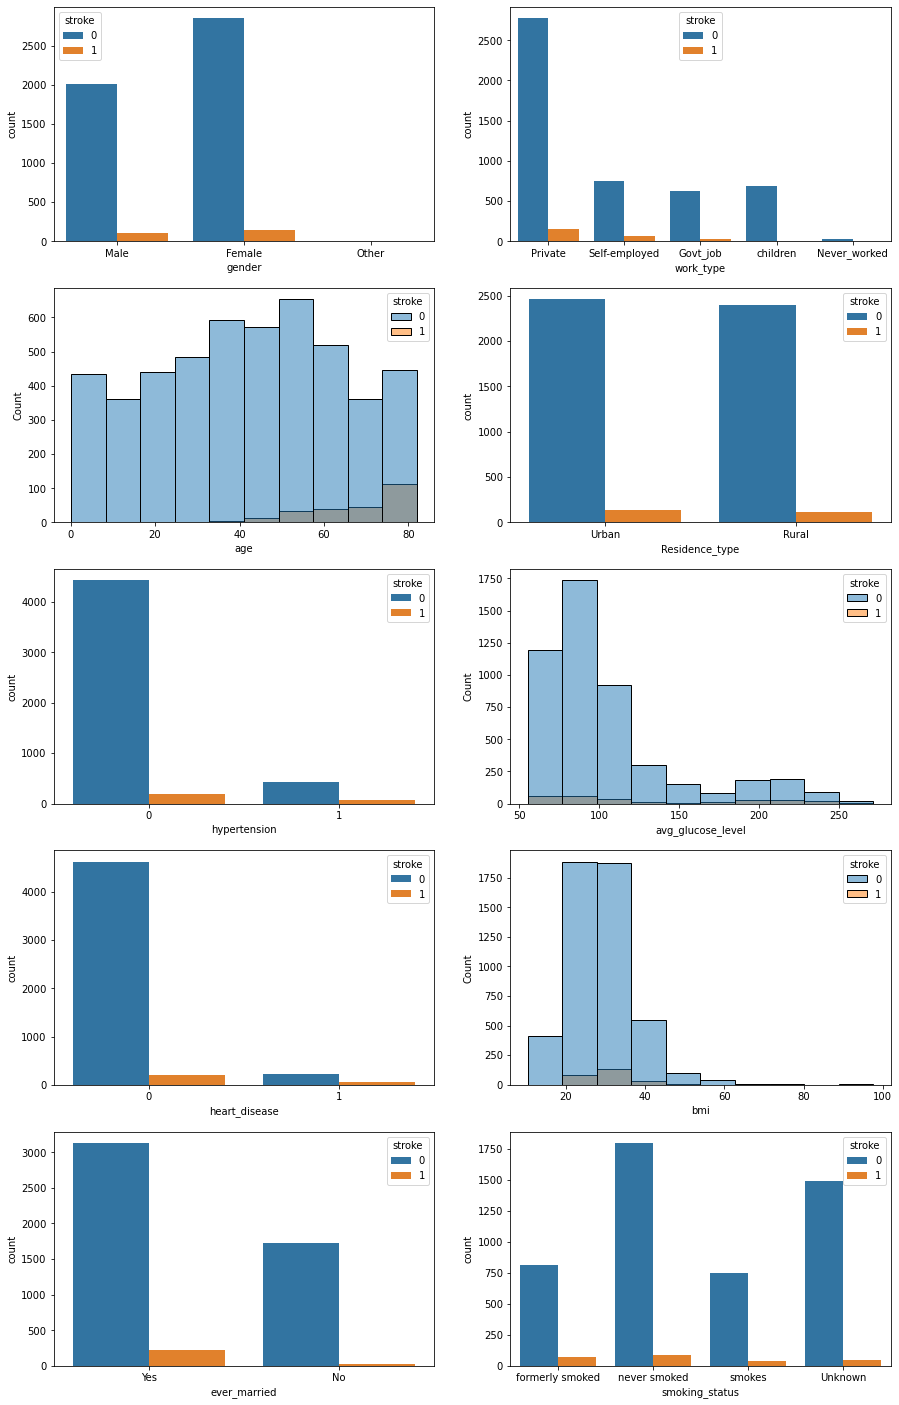

In [14]:
fig, axs = plt.subplots(nrows = 5,ncols=2,figsize=(15, 25))

i = 0
j = 0
for col in df.columns.to_list()[1:len(df.columns.to_list())-1]:
    if col in to_count:
        sns.countplot(x= col ,hue = 'stroke', data = df ,ax = axs[i][j])
        i+=1
        if i ==5:
            i=0
            j=j+1
    else:
        sns.histplot(data = df, x= col , hue = 'stroke' ,bins = 10 , ax = axs[i][j])
        
        i+=1
        if i ==5:
            i=0
            j=j+1


<AxesSubplot:xlabel='stroked people ages', ylabel='Density'>

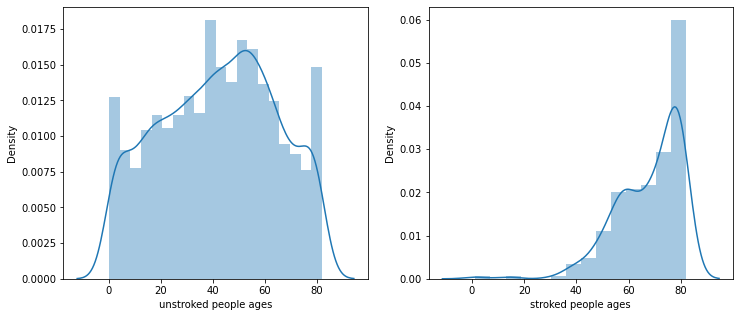

In [15]:
df2 = df[df.stroke == 1]
df3 = df[df.stroke == 0]
fig, axs = plt.subplots(nrows = 1,ncols=2,figsize=(12, 5))
sns.distplot(df3.age,ax = axs[0],axlabel = 'unstroked people ages')
sns.distplot(df2.age,ax = axs[1],axlabel = 'stroked people ages')

### higher stroke rates are at older ages which is logic

### numerical data isn't normally distributed and their value ranges vary so I'll use min-max scaling

### Catigorical data is imbalanced

# 

In [16]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
ordinal = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
names = []
for var in ordinal:
    names.append('ordinal_'+var)
df_ordinal = enc.fit_transform(df[ordinal])
df_ordinal = pd.DataFrame(df_ordinal.astype(int),columns = names)
df = df.join(df_ordinal)

In [19]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ordinal_gender,ordinal_ever_married,ordinal_work_type,ordinal_Residence_type,ordinal_smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,0,1,2,1,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0,1,3,1,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0,1,3,0,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1,1,2,0,1


In [20]:
x = df.drop(['stroke','id'],axis = 1)
Y = df['stroke']

In [21]:
X = x.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis = 1)


### for solving imbalance problem SMOTE may be used (trees based algorithms doesn't improve by SMOTE as they don't get effected by imbalance problem)

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, Y)

y_smote.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

### I used SMOTE (over sampling technique ) as the data is relatively small so if I would use under sampling technique data loss will be a real problem

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify = y_smote, random_state = 42)

In [25]:
scale = MinMaxScaler()
scale

MinMaxScaler()

In [26]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

### choosing min-max normalization was for two reasons
####   1 it is not a good Idea to apply standard scaler normalization on non-normally distributed data because it may not give reliable results
####   2 using standard scaler may not be very reliable on this data as it changes the distribution to be around zero and the data provided can't be negative (wouldn't be so logical)

In [27]:
classifier = SVC(kernel = 'rbf', random_state = 20,class_weight = 'balanced')
classifier.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', random_state=20)

In [28]:
y_pred_SVM = classifier.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, y_pred_SVM))
print('Train score : ', f1_score(y_train, classifier.predict(X_train_scaled)))
print('test score : ', f1_score(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       973
           1       0.81      0.88      0.84       972

    accuracy                           0.83      1945
   macro avg       0.84      0.83      0.83      1945
weighted avg       0.84      0.83      0.83      1945

Train score :  0.8548825710754018
test score :  0.8417939871858058


### SVM didn't work well because the normalization technique used before (Min-Max) as it (Min-Max) is affected by outliers but without the normalization accuracy would be worse than this

# 

### Imbalanced data doesn't affect decision trees but as the data is relatively small so I would keep using SMOTE to prevent the models from overfitting to get (real good accuracy as the accuracy of the f1-score may get very high as most of the data would be predicted as false while we care more about true values so that is why I would keep the oversampling)

In [30]:
RF = RandomForestClassifier(n_estimators = 300,
                            random_state=42,
                            warm_start=True,
                            n_jobs = -1)

RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42,
                       warm_start=True)

In [31]:
y_pred_RF = RF.predict(X_test)

### as decision trees don't get affected by normalization (scaling) so using it will not make much difference so I just ignored it 

In [32]:
print(classification_report(y_test, y_pred_RF))
print('Train score : ', f1_score(y_train, RF.predict(X_train)))
print('test score : ', f1_score(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       973
           1       0.93      0.97      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

Train score :  1.0
test score :  0.9487951807228916


In [33]:
XGB = xgb.XGBClassifier(n_estimators=2000,learning_rate=0.08,n_jobs=-1,max_depth =3,)
XGB.fit(X_train, y_train)

[22:16:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred_XGB = XGB.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_XGB))
print('Train score : ', f1_score(y_train, XGB.predict(X_train)))
print('test score : ', f1_score(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       973
           1       0.96      0.97      0.96       972

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

Train score :  0.991351490899703
test score :  0.9610655737704917


### using these hyper parameters I got good accuracy with the least least overfitting as XGBoost tend to overfit and the data size isn't very large